In [8]:
pip install langgraph typing-extensions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.6 MB/s eta 0:00:00
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 kB 3.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.4/476.4 kB 10.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.6/463.6 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.2 MB/s eta 0:00:00
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Using cached ht

In [9]:
from typing import TypedDict
from langgraph.graph import StateGraph


In [10]:
class AgentState(TypedDict):
  message : str

def greeting_node(state:AgentState) -> AgentState:
  """ Simple node that adds greeting message to the state"""

  state['message'] = 'Hello ' + state['message'] + " how is your day going?"

  return state


In [11]:
graph = StateGraph(AgentState)

graph.add_node("greeter",greeting_node)

graph.set_entry_point("greeter")

graph.set_finish_point("greeter")

app = graph.compile()

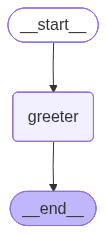

In [12]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
result = app.invoke({"message":"Bob"})

result["message"]

'Hello Bob how is your day going?'